In [1]:
#Importation des bibliothèqes
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/data_merge.csv")

print(df.shape)
print(df.columns)
print(df.head())
print(df.info())

C:\Users\UGO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(53936, 38)
Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cod_cbr', 'hybride',
       'puiss_admin_98', 'puiss_max', 'typ_boite_nb_rapp', 'conso_urb',
       'conso_exurb', 'conso_mixte', 'co2', 'co_typ_1', 'nox', 'ptcl',
       'masse_ordma_min', 'masse_ordma_max', 'champ_v9', 'Carrosserie',
       'gamme', 'Country', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'Cn', 'Ct',
       'm (kg)', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)'],
      dtype='object')
      lib_mrq lib_mod_doss lib_mod                        dscom cod_cbr  \
0  ALFA-ROMEO          159     159         159 2.0 JTDm (170ch)      GO   
1  ALFA-ROMEO          159     159     159 2.0 JTDm (170ch) ECO      GO   
2  ALFA-ROMEO          159     159      159 SW 2.0 JTDm (170ch)      GO   
3  ALFA-ROMEO          159     159      159 SW 2.0 JTDm (170ch)      GO   
4  ALFA-ROMEO          159     159  159 SW 2.0 JTDm (170ch) ECO      GO   

  hybride  puiss_admin_98 puiss_max typ_bo

**Transformation des données quantitatives**

Le type de certaines données quantitatives sont des chaînes de caractères alors que cela devrait être des flottants.
Ainsi on change le type de ces données (il faut également transformer le '.' en ','.

In [3]:
df["puiss_max"] = df["puiss_max"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["conso_urb"] = df["conso_urb"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["conso_exurb"] = df["conso_exurb"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["conso_mixte"] = df["conso_mixte"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["co_typ_1"] = df["co_typ_1"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["nox"] = df["nox"].apply(lambda x: str(x).replace(",", ".")).astype("float64")
df["ptcl"] = df["ptcl"].apply(lambda x: str(x).replace(",", ".")).astype("float64")

**Etude de "ep (kW)" et "puiss_max"**

Ces 2 variables sont similaires et donnent des informations sur la puissance maximale du moteur.

In [4]:
print(df[["ep (KW)","puiss_max"]].isnull().sum())
print(df[["ep (KW)","puiss_max"]].describe())

print(df[["ep (KW)","puiss_max"]])

ep (KW)      12814
puiss_max        0
dtype: int64
            ep (KW)     puiss_max
count  41122.000000  53936.000000
mean      87.583362     88.544946
std       29.689369     30.793590
min       10.000000     10.000000
25%       66.000000     66.000000
50%       81.000000     84.000000
75%       97.000000    103.000000
max      419.000000    419.000000
       ep (KW)  puiss_max
0          NaN      125.0
1          NaN      125.0
2          NaN      125.0
3          NaN      125.0
4          NaN      125.0
5          NaN      331.0
6          NaN      147.0
7          NaN      147.0
8          NaN      147.0
9          NaN      147.0
10         NaN      147.0
11         NaN      147.0
12         NaN      147.0
13         NaN      147.0
14         NaN      125.0
15         NaN      125.0
16         NaN      125.0
17         NaN      125.0
18         NaN      125.0
19         NaN      125.0
20         NaN      125.0
21         NaN      125.0
22         NaN      125.0
23         NaN     

In [5]:
df_ep_not_null = df[["ep (KW)","puiss_max"]].loc[~df["ep (KW)"].isnull()]
print(df_ep_not_null.isnull().sum())
print(df_ep_not_null.shape)
print((df_ep_not_null["ep (KW)"] == df_ep_not_null["puiss_max"]).sum())
print((np.abs(df_ep_not_null["ep (KW)"] - df_ep_not_null["puiss_max"])).describe())
print((np.abs(df_ep_not_null["ep (KW)"] - df_ep_not_null["puiss_max"]) > 10).sum())

ep (KW)      0
puiss_max    0
dtype: int64
(41122, 2)
40254
count    41122.000000
mean         0.147118
std          1.911414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
dtype: float64
196


In [6]:
print(df.shape)
df = df.loc[(np.abs(df["ep (KW)"] - df["puiss_max"]) < 10) | (df["ep (KW)"].isnull())]
print(df.shape)
df = df.drop(["ep (KW)"],axis=1)
print(df.shape)

(53936, 38)
(53722, 38)
(53722, 37)


**Etude de "ec (cm3)"**

On supprime les valeurs considérées comme extrêmes

In [7]:
print(df["ec (cm3)"].isnull().sum())
print(df["ec (cm3)"].describe())


Q1 = df["ec (cm3)"].describe()["25%"]
Q3 = df["ec (cm3)"].describe()["75%"]
IQR = Q3-Q1
print(IQR)
limit_basse = Q1-IQR*1.5
limit_haute = Q3+IQR*1.5
print(limit_basse)
print(limit_haute)
df_ec_faible = df.loc[df["ec (cm3)"] < 800]
print(df_ec_faible.shape[0])
df_ec_haute = df.loc[df["ec (cm3)"] > 7000]
print(df_ec_haute.shape[0])

757
count    52965.000000
mean      1561.698065
std        373.368484
min          0.000000
25%       1398.000000
50%       1560.000000
75%       1598.000000
max       8400.000000
Name: ec (cm3), dtype: float64
200.0
1098.0
1898.0
14
1


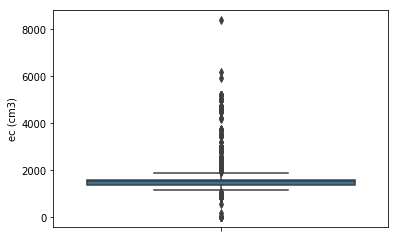

In [8]:
sns.boxplot(y=df["ec (cm3)"])

(53722, 37)
(52965, 37)


(array([1.3000e+01, 1.0000e+00, 1.1440e+04, 2.9705e+04, 8.8380e+03,
        2.5230e+03, 1.0000e+01, 3.6200e+02, 2.5000e+01, 1.0000e+00,
        9.0000e+00, 2.3000e+01, 1.2000e+01, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.,  420.,  840., 1260., 1680., 2100., 2520., 2940., 3360.,
        3780., 4200., 4620., 5040., 5460., 5880., 6300., 6720., 7140.,
        7560., 7980., 8400.]),
 <a list of 20 Patch objects>)

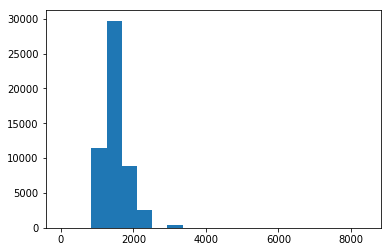

In [9]:
print(df.shape)
df = df.loc[~df["ec (cm3)"].isnull()]
print(df.shape)
plt.hist(df["ec (cm3)"],bins=20)

In [10]:
print(df.shape)
df = df.loc[(df["ec (cm3)"] > 800) & (df["ec (cm3)"] < 7000)]
print(df.shape)

(52965, 37)
(52950, 37)


**Etude de "Ft" et "cod_cbr", puis 'Fm'**

In [11]:
print(df["Ft"].value_counts())
print(df["cod_cbr"].value_counts())

Diesel             26482
Petrol             14414
DIESEL              3169
petrol              2652
PETROL              2350
diesel              2208
LPG                  598
Diesel-Electric       40
NG-Biomethane          6
ELECTRIC               4
Electric               3
                       3
Biodiesel              1
DIESEL-ELECTRIC        1
petrol-electric        1
Name: Ft, dtype: int64
GO       32276
ES       19714
GH         347
GP/ES      285
ES/GP      285
GL          32
EH           5
ES/GN        3
GN/ES        3
Name: cod_cbr, dtype: int64


In [12]:
to_replace = ["DIESEL","petrol","diesel","PETROL","electric","ELECTRIC","DIESEL-ELECTRIC"]
value = ["Diesel","Petrol","Diesel","Petrol","Electric","Electric","Diesel-Electric"]
df["Ft"] = df["Ft"].replace(to_replace=to_replace,value=value)
print(df["Ft"].value_counts())
print(df["cod_cbr"].value_counts())
print(df[["Ft","cod_cbr"]].isnull().sum())

Diesel             31859
Petrol             19416
LPG                  598
Diesel-Electric       41
Electric               7
NG-Biomethane          6
                       3
Biodiesel              1
petrol-electric        1
Name: Ft, dtype: int64
GO       32276
ES       19714
GH         347
GP/ES      285
ES/GP      285
GL          32
EH           5
ES/GN        3
GN/ES        3
Name: cod_cbr, dtype: int64
Ft         1018
cod_cbr       0
dtype: int64


In [13]:
pd.crosstab(df["Ft"],df['cod_cbr'])

cod_cbr,EH,ES,ES/GN,ES/GP,GH,GL,GN/ES,GO,GP/ES
Ft,,,,,,,,,
,0,1,0,0,0,0,0,2,0
Biodiesel,0,0,0,0,0,0,0,1,0
Diesel,0,72,0,0,305,1,0,31481,0
Diesel-Electric,0,0,0,0,14,27,0,0,0
Electric,0,1,0,0,5,1,0,0,0
LPG,0,28,0,285,0,0,0,0,285
NG-Biomethane,0,0,3,0,0,0,3,0,0
Petrol,5,19342,0,0,1,2,0,66,0
petrol-electric,0,0,0,0,0,1,0,0,0


In [14]:
print(df["Fm"].value_counts())

M    51221
B      616
F        1
Name: Fm, dtype: int64


In [15]:
print(df.shape)
df = df.drop(["Ft","Fm"],axis=1)
print(df.shape)


(52950, 37)
(52950, 35)


In [16]:
print(df["cod_cbr"].isnull().sum())

0


**Etude "W (mm)", "At1 (mm)" et "At2 (mm)"**

In [17]:
print(df["W (mm)"].describe())
print(df["W (mm)"].isnull().sum())

count    52373.000000
mean      2663.134898
std        186.319019
min        695.000000
25%       2589.000000
50%       2647.000000
75%       2776.000000
max       4813.000000
Name: W (mm), dtype: float64
577


In [18]:
print(df.shape)
df = df.loc[~df["W (mm)"].isnull()]
print(df.shape)

(52950, 35)
(52373, 35)


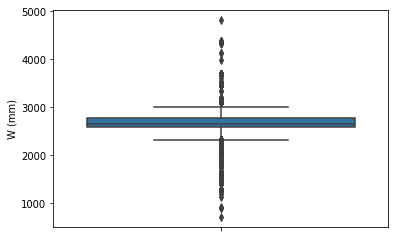

In [19]:
sns.boxplot(y=df["W (mm)"])

In [20]:
print(df[["At1 (mm)","At2 (mm)"]].isnull().sum())
print(df[["At1 (mm)","At2 (mm)"]].describe())

At1 (mm)     430
At2 (mm)    4464
dtype: int64
           At1 (mm)      At2 (mm)
count  51943.000000  47909.000000
mean    1546.561827   1539.451898
std      143.337370    140.820673
min      695.000000    850.000000
25%     1497.000000   1486.000000
50%     1536.000000   1531.000000
75%     1574.000000   1556.000000
max     3122.000000   3122.000000


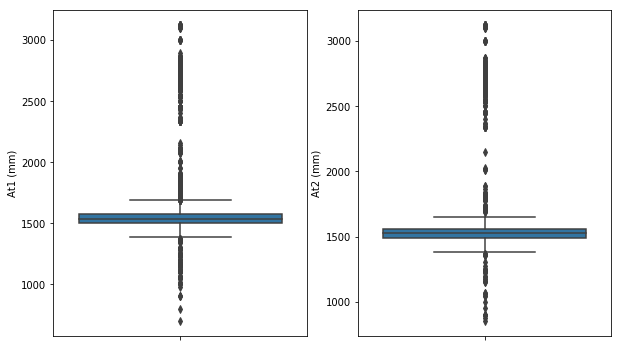

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["At1 (mm)"])
plt.subplot(1,2,2)
sns.boxplot(y=df["At2 (mm)"])

In [22]:
axle_diff = np.abs(df["At2 (mm)"]-df["At1 (mm)"])
print(axle_diff.describe())
print((axle_diff > 500).sum())

count    47902.000000
mean        13.032441
std         23.314820
min          0.000000
25%          2.000000
50%          6.000000
75%         14.000000
max       1156.000000
dtype: float64
16


In [23]:
print(df.shape)
df = df.loc[~df["At1 (mm)"].isnull()]
print(df.shape)

(52373, 35)
(51943, 35)


In [24]:
print(df[["At1 (mm)","At2 (mm)"]].isnull().sum())
df["At2 (mm)"].loc[df["At2 (mm)"].isnull()] = df["At1 (mm)"].loc[df["At2 (mm)"].isnull()]
print(df[["At1 (mm)","At2 (mm)"]].isnull().sum())

At1 (mm)       0
At2 (mm)    4041
dtype: int64
At1 (mm)    0
At2 (mm)    0
dtype: int64


**Etude de "Enedc (g/km)" et "co2"**

In [25]:
print(df[["Enedc (g/km)","co2"]].describe())
print((df["Enedc (g/km)"] == df["co2"]).sum())
print(df[["Enedc (g/km)","co2"]].isnull().sum())


       Enedc (g/km)           co2
count  51932.000000  51943.000000
mean     126.605754    125.746164
std       26.706802     25.928443
min       48.000000     48.000000
25%      105.000000    105.000000
50%      120.000000    120.000000
75%      144.000000    140.000000
max      571.000000    388.000000
42318
Enedc (g/km)    11
co2              0
dtype: int64


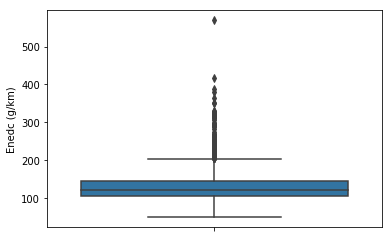

In [26]:
sns.boxplot(y=df["Enedc (g/km)"])

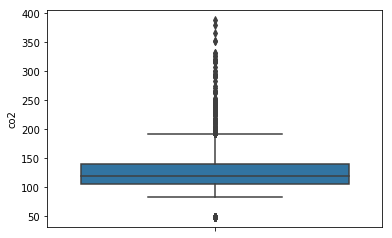

In [27]:
sns.boxplot(y=df["co2"])

0      3.0
2      3.0
3      3.0
409    2.0
410    2.0
dtype: float64
count    9614.000000
mean        7.594342
std         9.568686
min         1.000000
25%         4.000000
50%         5.000000
75%        10.000000
max       427.000000
dtype: float64
325
AxesSubplot(0.125,0.125;0.775x0.755)


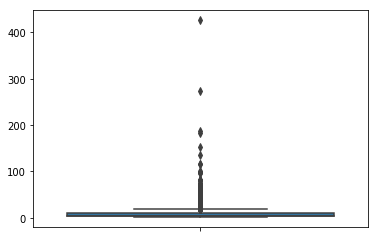

In [28]:
df_different_co2 = df[["Enedc (g/km)","co2"]].loc[df["Enedc (g/km)"] != df["co2"]]
df_different_co2 = np.abs(df_different_co2["Enedc (g/km)"]-df_different_co2["co2"])
print(df_different_co2.head())
print(df_different_co2.describe())
print((df_different_co2 > 20).sum())

print(sns.boxplot(y=df_different_co2))

In [29]:
print(df.shape)
df = df.loc[(np.abs(df["Enedc (g/km)"] - df["co2"]) < 20) ]
print(df.shape)
df = df.drop(["Enedc (g/km)"],axis=1)
print(df.shape)

(51943, 35)
(51469, 35)
(51469, 34)


In [30]:
print(df["co2"].describe())
print(df["co2"].isnull().sum())

count    51469.000000
mean       125.584099
std         25.903242
min         48.000000
25%        105.000000
50%        120.000000
75%        140.000000
max        388.000000
Name: co2, dtype: float64
0


**Etude de "m (kg)","masse_ordma_min" et "masse_ordma_max"**

In [31]:
print(df[["m (kg)","masse_ordma_min","masse_ordma_max"]].describe())
print((df["masse_ordma_min"] == df["masse_ordma_max"]).sum())
print(((df["m (kg)"] == df["masse_ordma_min"])).sum())
print(((df["m (kg)"] == df["masse_ordma_max"])).sum())
print(((df["m (kg)"] == df["masse_ordma_min"])|(df["m (kg)"] == df["masse_ordma_max"])).sum())
print(((df["m (kg)"] == df["masse_ordma_min"])&(df["m (kg)"] == df["masse_ordma_max"])).sum())

print(df[["m (kg)","masse_ordma_min","masse_ordma_max"]].head(10))

             m (kg)  masse_ordma_min  masse_ordma_max
count  51400.000000     51469.000000     51469.000000
mean    1422.545895      1373.601139      1392.986069
std      262.244670       245.754499       244.478502
min      401.000000       875.000000       925.000000
25%     1227.000000      1176.000000      1210.000000
50%     1390.000000      1359.000000      1387.000000
75%     1600.000000      1505.000000      1505.000000
max     3055.000000      2475.000000      2525.000000
40890
23383
20416
23976
19823
   m (kg)  masse_ordma_min  masse_ordma_max
0  1578.0             1565             1565
1  1565.0             1565             1565
2  1628.0             1615             1615
3  1627.0             1615             1615
4  1615.0             1615             1615
5  1750.0             1750             1750
6  1533.0             1505             1505
7  1505.0             1505             1505
8  1536.0             1505             1505
9  1547.0             1505             1505


In [32]:
diff_masse = np.abs(df["masse_ordma_min"]-df["masse_ordma_max"])
print(diff_masse.describe())
print((diff_masse > 1).sum())
print((diff_masse > 100).sum())

count    51469.000000
mean        19.384931
std         42.729641
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        322.000000
dtype: float64
10579
4497


In [33]:
#df_sans_masse = df.drop(["m (kg)","masse_ordma_min","masse_ordma_max"],axis=1)
df_sans_masse = df.drop(["m (kg)"],axis=1)
df_sans_masse.duplicated().sum()

9028

In [34]:
print(df.shape)
df = df.drop(["m (kg)"],axis=1)
print(df.shape)

(51469, 34)
(51469, 33)


In [35]:
print(df.shape)
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)
print(df.duplicated().sum())

(51469, 33)
9028
(42441, 33)
0


In [36]:
print(df[["masse_ordma_min","masse_ordma_max"]].isnull().sum())

masse_ordma_min    0
masse_ordma_max    0
dtype: int64


**Etude de "Ct"**

Selon ChatGPT

Un véhicule de type M1 correspond à une voiture particulière selon la classification de la Commission économique pour l’Europe des Nations Unies (CEE-ONU) et la réglementation européenne.

Définition d’un véhicule M1 :
Il s'agit d’un véhicule conçu et construit pour le transport de passagers, ayant au maximum 8 places assises en plus du siège du conducteur.

Une voiture de type M1G est une voiture particulière tout-terrain.

In [37]:
#Category of the vehicle type approved
print(df["Ct"].value_counts())
print(df["Ct"].isnull().sum())

M1     42307
M1G      133
Name: Ct, dtype: int64
1


In [38]:
print(df.shape)
df = df.loc[~df["Ct"].isnull()]
print(df.shape)

(42441, 33)
(42440, 33)


**Etude des marques : ("lib_mrq","lib_mod_doss","lib_mod","dscom","Mp","Mh","Man","MMS","Cn")**



In [39]:
df_marque = df[["lib_mrq","lib_mod_doss","lib_mod","dscom","Mp","Mh","Man","MMS","Cn"]]
print(df_marque.isnull().sum())
print(df_marque.head(10))

lib_mrq             0
lib_mod_doss        0
lib_mod             0
dscom               0
Mp              15178
Mh                  0
Man                 0
MMS              6674
Cn                  8
dtype: int64
       lib_mrq lib_mod_doss    lib_mod                                  dscom  \
0   ALFA-ROMEO          159        159                   159 2.0 JTDm (170ch)   
1   ALFA-ROMEO          159        159               159 2.0 JTDm (170ch) ECO   
2   ALFA-ROMEO          159        159                159 SW 2.0 JTDm (170ch)   
4   ALFA-ROMEO          159        159            159 SW 2.0 JTDm (170ch) ECO   
5   ALFA-ROMEO  AR8C SPIDER  8C SPIDER                              8C SPIDER   
6   ALFA-ROMEO        BRERA      BRERA                 BRERA 1750 TBI (200ch)   
7   ALFA-ROMEO        BRERA      BRERA                 BRERA 1750 TBI (200ch)   
14  ALFA-ROMEO        BRERA      BRERA                 BRERA 2.0 JTDm (170ch)   
15  ALFA-ROMEO        BRERA      BRERA                 BRERA

In [40]:
df["lib_mrq"].value_counts()

RENAULT         13031
CITROEN         10441
PEUGEOT          7736
VOLVO            5083
DACIA            5010
FIAT              541
NISSAN            332
ALFA-ROMEO        105
SKODA              22
OPEL               18
VOLKSWAGEN         13
JAGUAR             13
LAMBORGHINI        12
LEXUS              11
MITSUBISHI         10
LANCIA              9
LOTUS               8
INFINITI            7
SUZUKI              7
ASTON MARTIN        6
SUBARU              4
CHEVROLET           4
LAND ROVER          4
MASERATI            3
MERCEDES            3
KIA                 2
HONDA               2
HYUNDAI             1
JEEP                1
CADILLAC            1
Name: lib_mrq, dtype: int64

**Etude Norme**

In [41]:
print(df["champ_v9"].value_counts())
print(df.duplicated().sum())
print(df["champ_v9"].isnull().sum())

715/2007*630/2012EURO5     15842
715/2007*195/2013EURO5     10618
"715/2007*630/2012EURO5     5956
"715/2007*195/2013EURO5     4436
715/2007*566/2011EURO5      3514
715/2007*195/2013EURO6       600
715/2007*692/2008EURO5       563
715/2007*459/2012EURO5       344
"715/2007*630/2012EURO6      159
715/2007*630/2012EURO6       121
"715/2007*459/2012EURO5      108
"715/2007*566/2011EURO5      103
"715/2007*195/2013EURO6       49
"715/2007*692/2008EURO5       23
715/2007*459/2012EURO6         4
Name: champ_v9, dtype: int64
0
0


In [42]:
to_replace = ['"715/2007*630/2012EURO5','"715/2007*195/2013EURO5','"715/2007*630/2012EURO6','"715/2007*566/2011EURO5',
              '"715/2007*459/2012EURO5','"715/2007*195/2013EURO6','"715/2007*692/2008EURO5']
value = ['715/2007*630/2012EURO5','715/2007*195/2013EURO5','715/2007*630/2012EURO6','715/2007*566/2011EURO5',
              '715/2007*459/2012EURO5','715/2007*195/2013EURO6','715/2007*692/2008EURO5']
df["champ_v9"] = df["champ_v9"].replace(to_replace=to_replace,value=value)
print(df["champ_v9"].value_counts())
print(df.duplicated().sum())

715/2007*630/2012EURO5    21798
715/2007*195/2013EURO5    15054
715/2007*566/2011EURO5     3617
715/2007*195/2013EURO6      649
715/2007*692/2008EURO5      586
715/2007*459/2012EURO5      452
715/2007*630/2012EURO6      280
715/2007*459/2012EURO6        4
Name: champ_v9, dtype: int64
0


In [43]:
print(df["Tan"].value_counts().head())
print(df["Tan"].isnull().sum())

e2*2001/116*0314*68    451
e2*2001/116*0327*58    436
e2*2001/116*0327*56    412
e2*2001/116*0327*57    364
e2*2001/116*0314*66    353
Name: Tan, dtype: int64
3221


**Etude hybride**

In [44]:
print(df["hybride"].value_counts())
print(df["hybride"].isnull().sum())

non    42107
oui      333
Name: hybride, dtype: int64
0


**Etude de "puiss_admin_98"**

In [45]:
print(df["puiss_admin_98"].describe())
print(df["puiss_admin_98"].isnull().sum())

count    42440.000000
mean         6.700730
std          2.831416
min          3.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         50.000000
Name: puiss_admin_98, dtype: float64
0


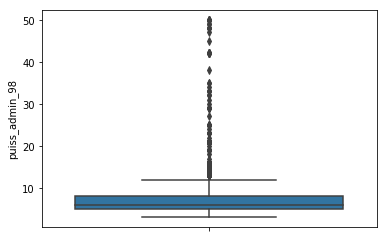

In [46]:
sns.boxplot(y=df["puiss_admin_98"])

(array([1.6443e+04, 1.4282e+04, 8.4500e+03, 1.6820e+03, 8.6800e+02,
        4.3700e+02, 8.0000e+00, 2.1700e+02, 6.0000e+00, 6.0000e+00,
        1.0000e+00, 8.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 8.0000e+00, 1.0000e+00, 1.0000e+00, 1.3000e+01]),
 array([ 3.  ,  5.35,  7.7 , 10.05, 12.4 , 14.75, 17.1 , 19.45, 21.8 ,
        24.15, 26.5 , 28.85, 31.2 , 33.55, 35.9 , 38.25, 40.6 , 42.95,
        45.3 , 47.65, 50.  ]),
 <a list of 20 Patch objects>)

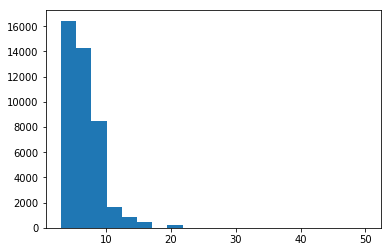

In [47]:
plt.hist(df["puiss_admin_98"],bins=20)

In [48]:
(df["puiss_admin_98"] > 30).sum()

33

**Etude de 'typ_boite_nb_rapp'**

In [49]:
print(df["typ_boite_nb_rapp"].value_counts())
print(df["typ_boite_nb_rapp"].isnull().sum())

M 5    16147
M 6    16007
A 6     8893
A 4      493
A 8      382
A 5      369
D 5      115
A 7       18
V 0       11
D 6        4
S 6        1
Name: typ_boite_nb_rapp, dtype: int64
0


In [50]:
print(df.shape)
df = df.loc[~((df["typ_boite_nb_rapp"] == "V 0")|(df["typ_boite_nb_rapp"] == "S 6"))]
print(df.shape)

(42440, 33)
(42428, 33)


In [51]:
print(df["typ_boite_nb_rapp"].value_counts())

M 5    16147
M 6    16007
A 6     8893
A 4      493
A 8      382
A 5      369
D 5      115
A 7       18
D 6        4
Name: typ_boite_nb_rapp, dtype: int64


In [52]:
print(df.shape)
df["typ_boite"] = df["typ_boite_nb_rapp"].str[0]
df["nb_rapp"] = df["typ_boite_nb_rapp"].str[2]
print(df.shape)

print(df[["typ_boite","nb_rapp"]].head())

(42428, 33)
(42428, 35)
  typ_boite nb_rapp
0         M       6
1         M       6
2         M       6
4         M       6
5         M       6


In [53]:
print(df.shape)
df = df.drop(["typ_boite_nb_rapp"], axis = 1)
print(df.shape)


(42428, 35)
(42428, 34)


**Etude des consos : ("conso_urb","conso_exurb","conso_mixte")**

In [54]:
print(df[["conso_urb","conso_exurb","conso_mixte"]].describe())
print(df[["conso_urb","conso_exurb","conso_mixte"]].isnull().sum())

          conso_urb   conso_exurb   conso_mixte
count  42428.000000  42428.000000  42428.000000
mean       6.321858      4.397181      5.092880
std        1.898233      0.833078      1.189944
min        0.000000      2.900000      1.800000
25%        4.900000      3.800000      4.200000
50%        6.000000      4.300000      4.900000
75%        7.600000      4.900000      5.900000
max       24.400000     11.700000     16.400000
conso_urb      0
conso_exurb    0
conso_mixte    0
dtype: int64


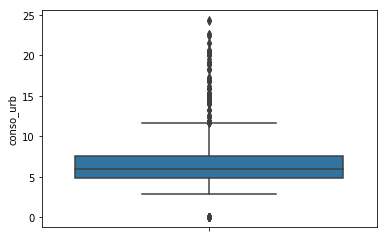

In [55]:
sns.boxplot(y=df["conso_urb"])

In [56]:
print((df["conso_urb"] < 1).sum())
print(df.shape)
df = df.loc[df["conso_urb"] > 1]
print(df.shape)

30
(42428, 34)
(42398, 34)


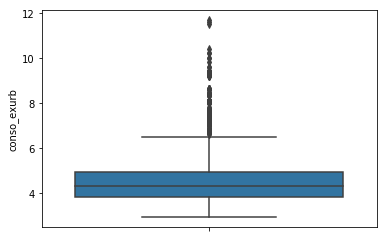

In [57]:
sns.boxplot(y=df["conso_exurb"])

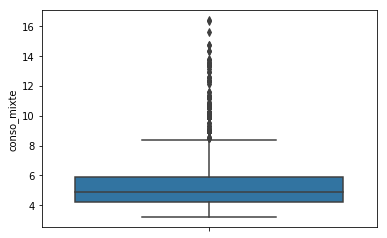

In [58]:
sns.boxplot(y=df["conso_mixte"])

**Etude des résultats d'essai : ("co_typ_1","nox","ptcl")**

In [59]:
print(df[["co_typ_1","nox","ptcl"]].describe())
print(df[["co_typ_1","nox","ptcl"]].isnull().sum())

           co_typ_1           nox          ptcl
count  42386.000000  42386.000000  33118.000000
mean       0.302295      0.098255      0.000742
std        0.143204      0.062222      0.000802
min        0.056000      0.001000      0.000000
25%        0.212000      0.027000      0.000000
50%        0.273000      0.120000      0.001000
75%        0.348000      0.147000      0.001000
max        0.931000      0.259000      0.010000
co_typ_1      12
nox           12
ptcl        9280
dtype: int64


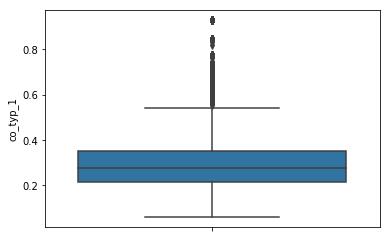

In [60]:
sns.boxplot(y=df["co_typ_1"])

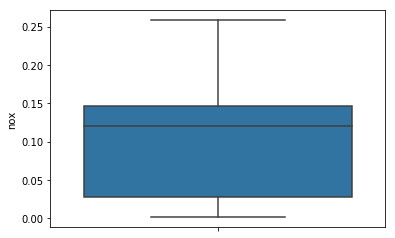

In [61]:
sns.boxplot(y=df["nox"])

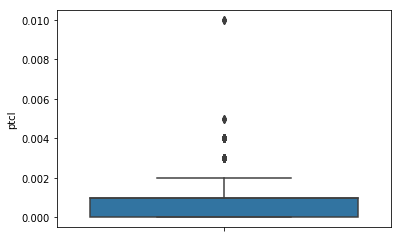

In [62]:
sns.boxplot(y=df["ptcl"])

**Etude de la Carosserie **

In [63]:
print(df["Carrosserie"].value_counts())
print(df["Carrosserie"].isnull().sum())

BERLINE                18140
BREAK                   6478
MONOSPACE COMPACT       5707
TS TERRAINS/CHEMINS     4112
COMBISPACE              2692
COUPE                   1571
MINIBUS                 1331
CABRIOLET                881
MINISPACE                860
MONOSPACE                626
Name: Carrosserie, dtype: int64
0


**Etude de la gamme**

In [64]:
print(df["gamme"].value_counts())
print(df["gamme"].isnull().sum())

INFERIEURE        16462
MOY-INFER         15055
MOY-SUPER          5601
SUPERIEURE         3702
ECONOMIQUE         1124
LUXE                423
MOY-INFERIEURE       31
Name: gamme, dtype: int64
0


**Création de la variable category**

On crée la variable category (les étiquettes).

In [65]:
bins = [0,100,120,140,160,200,250,100000]
label = ['A','B','C','D','E','F','G']
category = pd.cut(df["co2"],bins=bins,labels=label)

In [66]:
print(df.shape)
df["category"] = category
print(df.shape)


(42398, 34)
(42398, 35)


(42398,)
0    C
1    C
2    D
4    C
5    G
Name: category, dtype: category
Categories (7, object): [A < B < C < D < E < F < G]


Text(0.5,1,'Répartition des catégories du dataset fusionné')

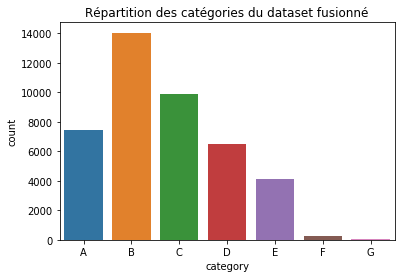

In [67]:
print(df["category"].shape)
print(df["category"].head())
sns.countplot(df["category"])
plt.title("Répartition des catégories du dataset fusionné")

**Conclusion **

Voici la taille et les colonnes conservées de notre dataset mergé.

In [68]:
print(df.shape)
print(df.columns)

(42398, 35)
Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cod_cbr', 'hybride',
       'puiss_admin_98', 'puiss_max', 'conso_urb', 'conso_exurb',
       'conso_mixte', 'co2', 'co_typ_1', 'nox', 'ptcl', 'masse_ordma_min',
       'masse_ordma_max', 'champ_v9', 'Carrosserie', 'gamme', 'Country', 'Mp',
       'Mh', 'Man', 'MMS', 'Tan', 'Cn', 'Ct', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'ec (cm3)', 'typ_boite', 'nb_rapp', 'category'],
      dtype='object')


In [69]:
df_unique = df.drop(['Mh', 'Man','Country', 'MMS', 'Tan','Cn'],axis=1)
print(df_unique.duplicated().sum())
df_unique = df_unique.drop_duplicates()
print(df_unique.shape)

36508
(5890, 29)


(5890,)
0    C
1    C
2    D
4    C
5    G
Name: category, dtype: category
Categories (7, object): [A < B < C < D < E < F < G]


Text(0.5,1,'Répartition des catégories du dataset fusionné sans les doublons')

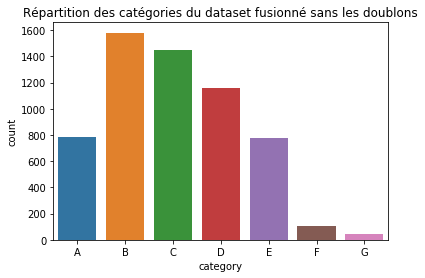

In [70]:
print(df_unique["category"].shape)
print(df_unique["category"].head())
sns.countplot(df_unique["category"])
plt.title("Répartition des catégories du dataset fusionné sans les doublons")

In [72]:
df.to_csv("../data/processed/data_merge.csv",index=False)
df_unique.to_csv("../data/processed/data_merge_v2.csv",index=False)

**Analyse variables**

Maintenant que le dataset est clean, et que on ne supprimera plus des données, on va en profiter pour faire des graphiques pour mieux comprendre nos données.

Text(0.5,1,"La puissance maximale en fonction de capacité du moteur pour chaque catégorie d'émission de CO2")

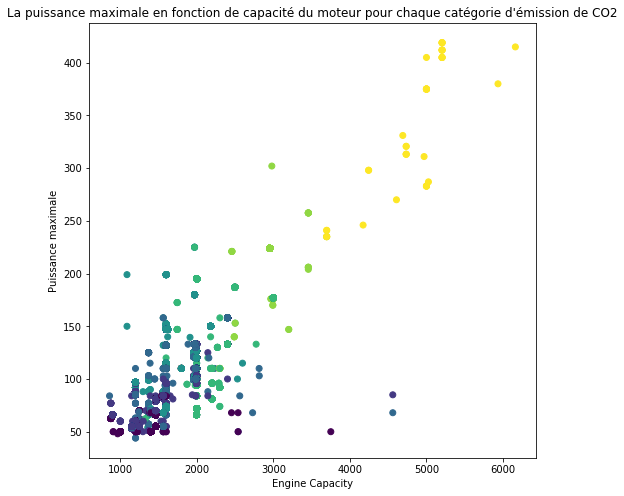

In [73]:
#plt.scatter(df["ec (cm3)"],df["puiss_max"],c=df["co2"])
plt.figure(figsize=(8,8))
plt.scatter(df["ec (cm3)"],df["puiss_max"],c=category.replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6]))
plt.xlabel("Engine Capacity")
plt.ylabel("Puissance maximale")
plt.title("La puissance maximale en fonction de capacité du moteur pour chaque catégorie d'émission de CO2")

Text(0,0.5,'Puissance maximale')

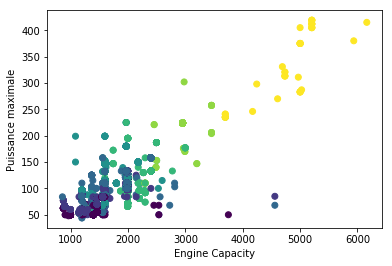

In [74]:
#plt.scatter(df["ec (cm3)"],df["puiss_max"],c=df["co2"])
plt.scatter(df_unique["ec (cm3)"],df_unique["puiss_max"],c=df_unique["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6]))
plt.xlabel("Engine Capacity")
plt.ylabel("Puissance maximale")